In [ ]:
#LR learning
# 1.2 学习目标
# 了解 逻辑回归 的理论
# 掌握 逻辑回归 的 sklearn 函数调用使用并将其运用到鸢尾花数据集预测
# Part2 基于鸢尾花（iris）数据集的逻辑回归分类实践
#  Step1:库函数导入 
#  Step2:数据读取/载入 
#  Step3:数据信息简单查看 
#  Step4:可视化描述 
#  Step5:利用 逻辑回归模型 在二分类上 进行训练和预测 
#  Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测
# 目标分类变量：花的类别（鸢尾的三个亚属类别,'setosa'(0), 'versicolor'(1), 'virginica'(2)），特征变量：sepal length(花萼长度),sepal width(花萼宽度),petal length(花瓣长度),petal width(花瓣宽度)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#载入数据（sklearn中自带的iris数据）
from sklearn.datasets import load_iris
data = load_iris() 
iris_target = data.target
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [9]:
iris_all = iris_features.copy() ##进行浅拷贝
iris_all['target'] = iris_target

In [10]:
iris_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


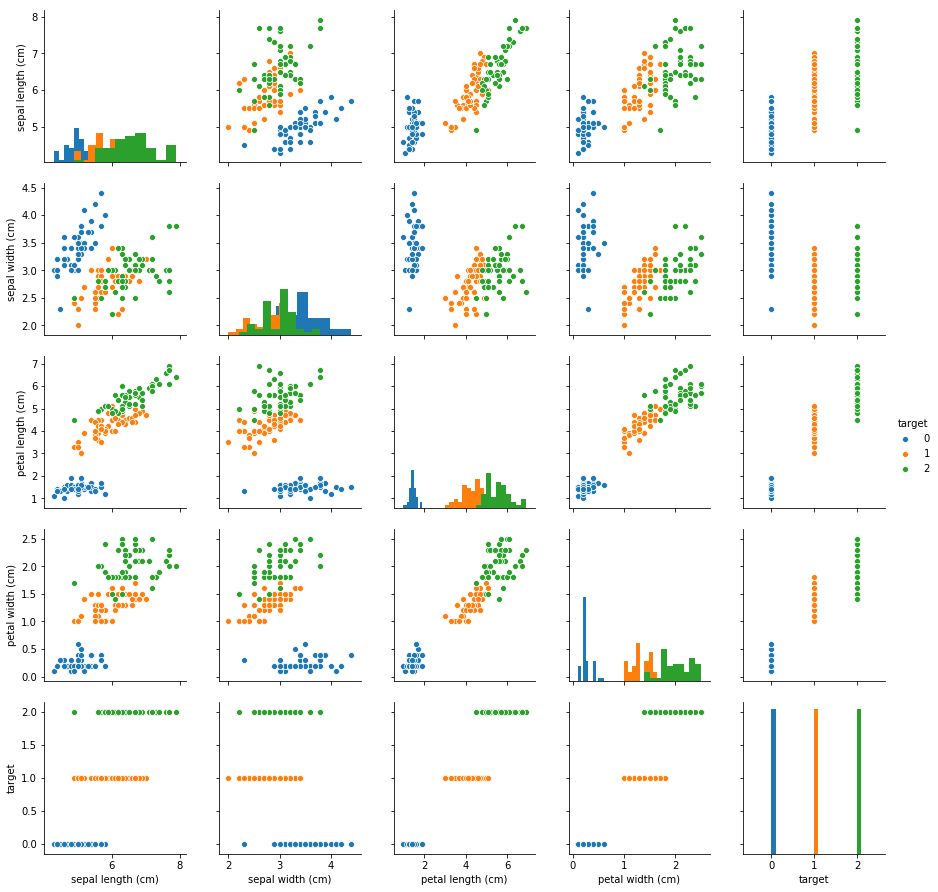

In [12]:
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')#通过散点图观察各特征与标签的两两间的分布关系
plt.show()

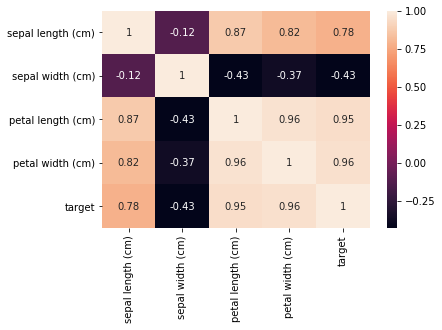

In [17]:
corr = iris_all.corr()#计算相关系数
sns.heatmap(corr, annot=True)#热力图
plt.show()
#target和petpetal尺寸(花瓣长宽)的相关性比跟sepal尺寸(花萼长宽)强，与sepal length(花萼宽度)的相关性最低

In [37]:
from sklearn.model_selection import cross_val_score, cross_val_predict#导入交叉验证
from sklearn.linear_model import LogisticRegression#导入LR
from sklearn  import metrics
final = LogisticRegression()
predicted = cross_val_predict(final, iris_features, iris_target, cv=5) #计算预测值
print('5折交叉验证预测值：', predicted)
scores = cross_val_score(final,iris_features, iris_target, cv=5) #计算模型的评分情况
print('评分：', scores)
print('准确度：', metrics.accuracy_score(predicted, iris_target)) #计算评分的均值

5折交叉验证预测值： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
评分： [1.         0.96666667 0.93333333 0.9        1.        ]
准确度： 0.96
